In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# %cd "/content/drive/MyDrive/Lol Frames"

path = "/content/drive/MyDrive/Lol Frames"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

# Ruta a la carpeta que contiene las subcarpetas de campeones
data_dir = path

# Definir parámetros
batch_size = 32
img_height = 150
img_width = 150
epochs = 20
# Definir el número de clases (número de campeones)
num_classes = 4  # Reemplaza esto con el número correcto de clases

# Crear un generador de datos con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalizar valores de píxeles
    validation_split=0.2,  # Dividir datos en entrenamiento y validación
    rotation_range=20,  # Rango de rotación aleatoria
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio
    shear_range=0.2,  # Deformación de corte aleatoria
    zoom_range=0.2,  # Aleatorizar el zoom
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'  # Relleno de píxeles al aplicar transformaciones
)

# Crear conjuntos de datos de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 1039 images belonging to 4 classes.
Found 258 images belonging to 4 classes.


In [ ]:
# Crear un modelo con más capas
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Agregar regularización de abandono
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)



In [ ]:
model = models.Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base (ResNet)
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/20
33/33 [==============================] - 469s 12s/step - loss: 1.4640 - accuracy: 0.2551 - val_loss: 1.3996 - val_accuracy: 0.2946
Epoch 2/20
33/33 [==============================] - 148s 5s/step - loss: 1.4002 - accuracy: 0.2676 - val_loss: 1.3830 - val_accuracy: 0.2946
Epoch 3/20
33/33 [==============================] - 138s 4s/step - loss: 1.4020 - accuracy: 0.2599 - val_loss: 1.3823 - val_accuracy: 0.2946
Epoch 4/20
33/33 [==============================] - 148s 5s/step - loss: 1.3942 - accuracy: 0.2782 - val_loss: 1.3791 - val_accuracy: 0.2946
Epoch 5/20
33/33 [==============================] - 161s 5s/step - loss: 1.3933 - accuracy: 0.2474 - val_loss: 1.3786 - val_accuracy: 0.2946
Epoch 6/20
33/33 [==============================] - 142s 4s/step - loss: 1.3882 - accuracy: 0.2685 - val_loss: 1.3806 - val_accuracy: 0.2946
Epoch 7/20
33/33 [==============================] - 150s 5s/step - loss: 1.3847 - accuracy: 0.2936 - val_loss: 1.3793 - val_accuracy: 0.2946
Epoch 8/20
3

In [ ]:

# Guardar el modelo entrenado
model.save('lol_champion_classifier4.1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


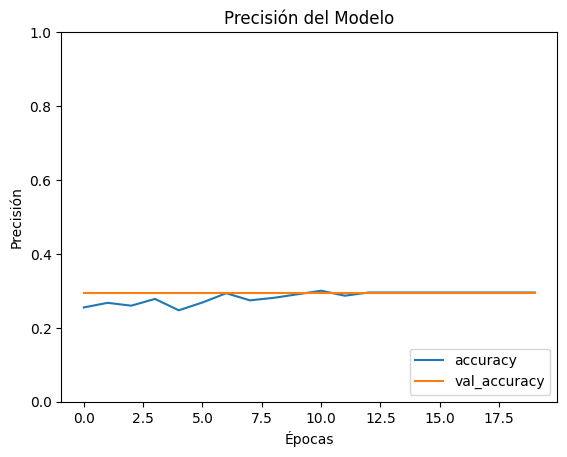

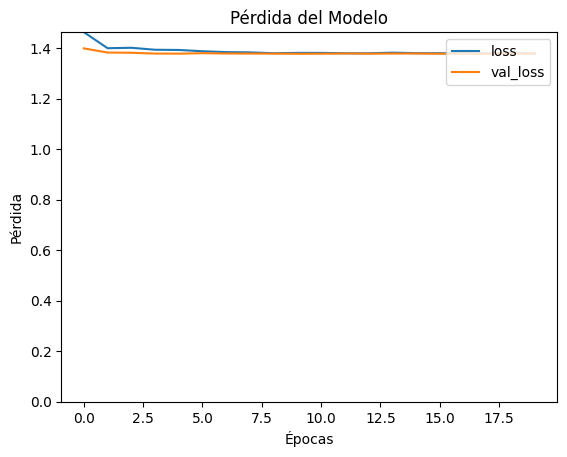

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Precisión del Modelo')
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Pérdida del Modelo')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Genera predicciones para el conjunto de validación
predictions = model.predict(validation_generator)

# Convierte las predicciones a etiquetas de clase (usando argmax)
predicted_classes = predictions.argmax(axis=1)

# Obtiene las etiquetas verdaderas del generador de validación
true_classes = validation_generator.classes

# Calcula la matriz de confusión
confusion = confusion_matrix(true_classes, predicted_classes)

# Imprime la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Calcula el accuracy por clase
accuracy_per_class = confusion.diagonal() / confusion.sum(axis=1)

# Imprime el accuracy por clase
print("Accuracy por clase:")
for i, class_name in enumerate(validation_generator.class_indices):
    print(f"{class_name}: {accuracy_per_class[i]}")

# Imprime un informe de clasificación detallado
print("\nInforme de clasificación:")
print(classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices))


9/9 [==============================] - 27s 3s/step
Matriz de confusión:
[[76  0  0  0]
 [59  0  0  0]
 [55  0  0  0]
 [68  0  0  0]]
Accuracy por clase:
alistar: 1.0
drmundo: 0.0
garen: 0.0
jhin: 0.0

Informe de clasificación:
              precision    recall  f1-score   support

     alistar       0.29      1.00      0.46        76
     drmundo       0.00      0.00      0.00        59
       garen       0.00      0.00      0.00        55
        jhin       0.00      0.00      0.00        68

    accuracy                           0.29       258
   macro avg       0.07      0.25      0.11       258
weighted avg       0.09      0.29      0.13       258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
